In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

df = pd.read_csv(r'D:\data analyst\datacleaning\restaurant\restaurant_sales_data.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [6]:
df['Order Date Month'] = df['Order Date'].dt.month

In [14]:
df_main_dish = df[(df['Category'] == 'Main Dishes') & (df['Order Date'].dt.year == 2023)].copy()

df_main_dish

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method,Order Date Month
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card,9
7,ORD_146656,CUST_077,Main Dishes,NaN,15.0,3.0,45.0,2023-02-15,Cash,2
11,ORD_726419,CUST_025,Main Dishes,Salmon,18.0,5.0,90.0,2023-10-30,Cash,10
12,ORD_754176,CUST_047,Main Dishes,Salmon,18.0,1.0,18.0,2023-04-11,Cash,4
20,ORD_845047,CUST_052,Main Dishes,Vegetarian Platter,14.0,4.0,56.0,2023-02-21,Digital Wallet,2
...,...,...,...,...,...,...,...,...,...,...
17480,ORD_771570,CUST_093,Main Dishes,Salmon,18.0,2.0,36.0,2023-03-24,Credit Card,3
17490,ORD_900549,CUST_047,Main Dishes,Salmon,18.0,2.0,36.0,2023-04-25,Digital Wallet,4
17495,ORD_872487,CUST_017,Main Dishes,Steak,20.0,5.0,100.0,2023-11-01,Credit Card,11
17525,ORD_326555,CUST_095,Main Dishes,Pasta Alfredo,12.0,3.0,36.0,2023-07-24,Digital Wallet,7


In [26]:
df_main_dish_pivot = df_main_dish.pivot_table(index='Order Date Month',columns='Item',aggfunc='size')
df_main_dish_pivot.loc['Total'] = df_main_dish_pivot.sum()
df_main_dish_pivot = df_main_dish_pivot[df_main_dish_pivot.loc['Total'].sort_values(ascending=False).index]
df_main_dish_pivot = df_main_dish_pivot.drop('Total')

df_main_dish_pivot

Item,Pasta Alfredo,Grilled Chicken,Steak,Salmon,Vegetarian Platter
Order Date Month,,,,,
1,27,35,19,18,13
2,42,24,17,21,12
3,44,34,30,15,16
4,36,33,28,19,17
5,42,44,31,17,17
6,48,28,25,14,16
7,38,38,22,17,13
8,42,43,25,14,17
9,44,33,14,17,14


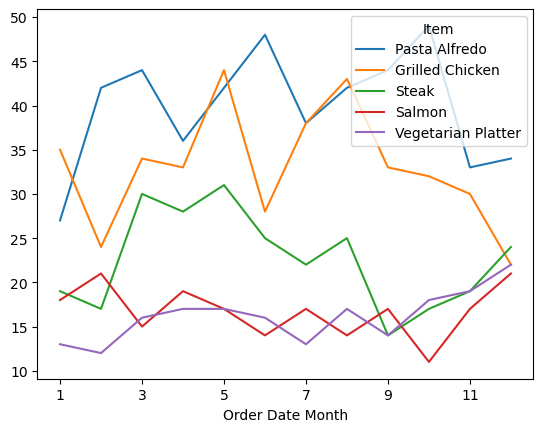

<Figure size 2000x100000 with 0 Axes>

In [ ]:

df_main_dish_pivot.plot(kind='line')

plt.show()